 # Business Understanding
 

In this study, we investigated the factors that impact the cost of a house in King's County. We studied these features, created and evaluated models that could estimate the price of the property.

### Questions we can answer from these dataset

1. How much can a stakeholder in King County offer for their homes?
2. How do I maximise the return of the real estate for the people in King County?
3. Factors that a higher effect on the price in the King County?

Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [94]:
#importing necessary analysis libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import statsmodels.api as sm

In [150]:
# import libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf


#importing machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm 
import scipy.stats as stats

In [96]:
#Loading orginal dataframe
df = pd.read_csv('Data\kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [97]:
#Viewing columns
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [98]:
#overview of the data and it data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [99]:
#Converting dates into datetime objects for easy manipulation
df['date'] = pd.to_datetime(df['date'])

In [100]:
#Checking for deplicates
df.duplicated().value_counts()

False    21597
dtype: int64

In [101]:
#dealing with missing values
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [102]:
df['yr_renovated'].fillna(0)
df['waterfront'].fillna(0)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21592    0.0
21593    0.0
21594    0.0
21595    0.0
21596    0.0
Name: waterfront, Length: 21597, dtype: float64

In [103]:
df['price']

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 21597, dtype: float64

In [104]:
#Creating a dataframe with only the position coordinates for home in the data
location_data = df[['price','lat','long']]
location_data.head()

,price,lat,long
0,221900.0,47.5112,-122.257
1,538000.0,47.7210,-122.319
2,180000.0,47.7379,-122.233
3,604000.0,47.5208,-122.393
4,510000.0,47.6168,-122.045


In [105]:
location_data.to_excel(r'Data\lcoation.xlsx', index=False)

In [106]:
#Creating dataframe for features I believe may be correlated with price
new_df = df[['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade','condition','yr_built', 'yr_renovated']]
new_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,condition,yr_built,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,7,3,1955,0.0
1,538000.0,3,2.25,2570,7242,2.0,7,3,1951,1991.0
2,180000.0,2,1.00,770,10000,1.0,6,3,1933,NaN
3,604000.0,4,3.00,1960,5000,1.0,7,5,1965,0.0
4,510000.0,3,2.00,1680,8080,1.0,8,3,1987,0.0
...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,8,3,2009,0.0
21593,400000.0,4,2.50,2310,5813,2.0,8,3,2014,0.0
21594,402101.0,2,0.75,1020,1350,2.0,7,3,2009,0.0
21595,400000.0,3,2.50,1600,2388,2.0,8,3,2004,0.0


In [107]:
new_df['yr_renovated'].fillna(0)

0           0.0
1        1991.0
2           0.0
3           0.0
4           0.0
          ...  
21592       0.0
21593       0.0
21594       0.0
21595       0.0
21596       0.0
Name: yr_renovated, Length: 21597, dtype: float64

In [108]:
new_df['condition'].unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [109]:
new_df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)

In [110]:
## Checking for Normality 

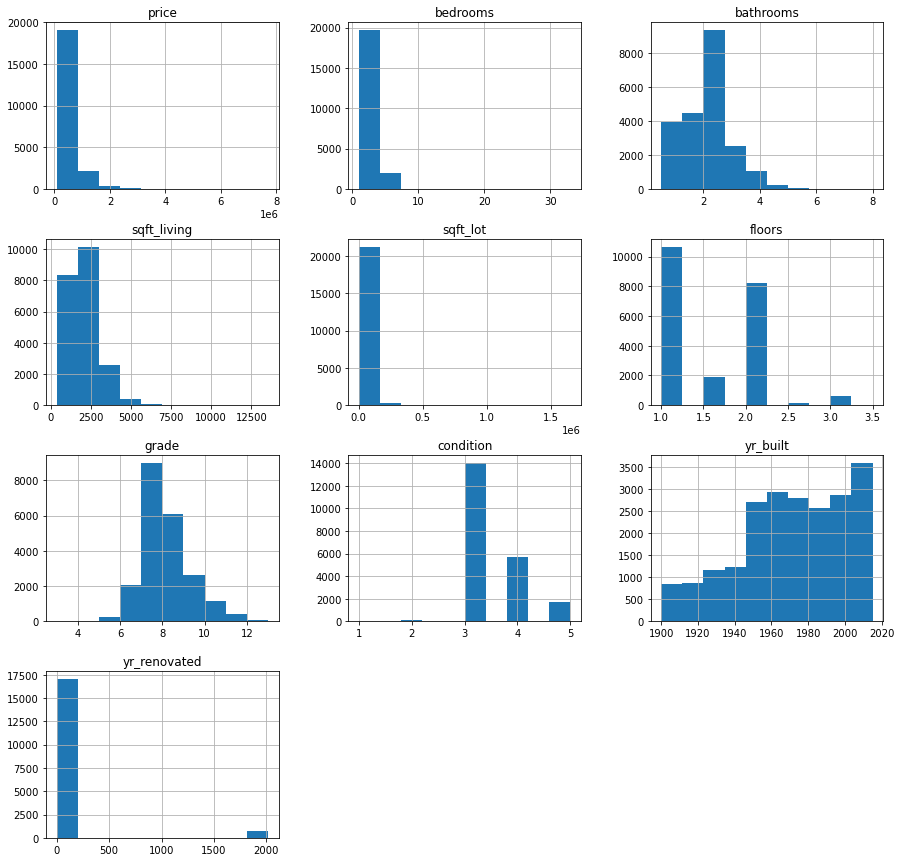

In [111]:

new_df.hist(figsize=(15,15));

# Assumptions of Linear Regression


## Linear relationship

In [112]:
new_df.columns[1:]

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade',
       'condition', 'yr_built', 'yr_renovated'],
      dtype='object')

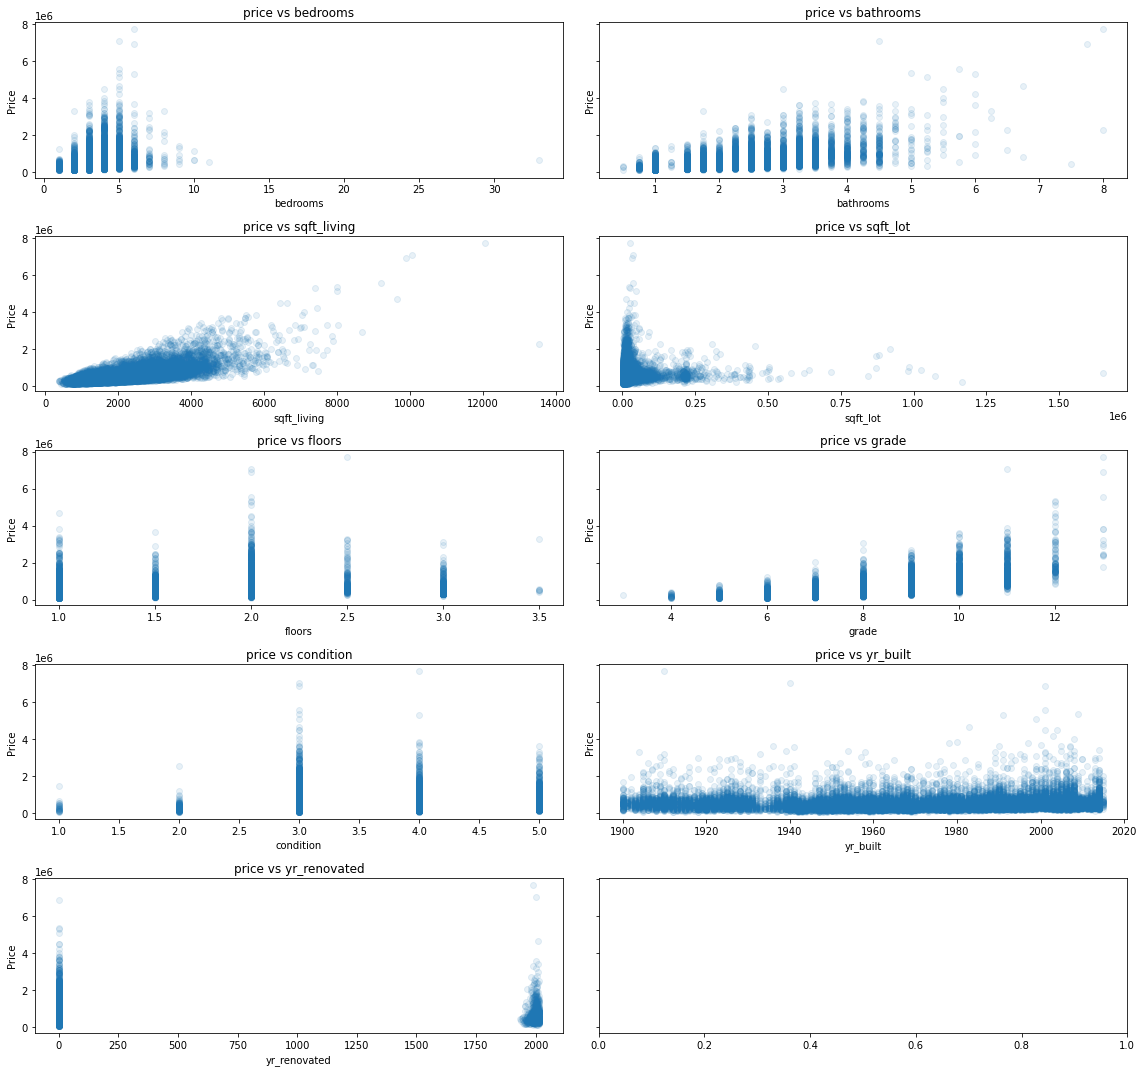

In [113]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16,15), sharey=True )

#simultaneously iterate through each column of data and through each of our axes making a plot for each step along the way
for ax, column in zip(axes.flatten(), new_df.columns[1:]):
    ax.scatter(new_df[column], new_df['price'], label=column, alpha=.1)
    ax.set_title(f'price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price')
fig.tight_layout()

In [114]:
new_df['renovation'] =  new_df['yr_renovated'].map(lambda x : '0' if x == 0 else( '1') ) 
new_df['renovation']

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18816\139705883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['renovation'] =  new_df['yr_renovated'].map(lambda x : '0' if x == 0 else( '1') )


0        0
1        1
2        1
3        0
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Name: renovation, Length: 21597, dtype: object

In [115]:
new_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,condition,yr_built,yr_renovated,renovation
0,221900.0,3,1.00,1180,5650,1.0,7,3,1955,0.0,0
1,538000.0,3,2.25,2570,7242,2.0,7,3,1951,1991.0,1
2,180000.0,2,1.00,770,10000,1.0,6,3,1933,NaN,1
3,604000.0,4,3.00,1960,5000,1.0,7,5,1965,0.0,0
4,510000.0,3,2.00,1680,8080,1.0,8,3,1987,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,8,3,2009,0.0,0
21593,400000.0,4,2.50,2310,5813,2.0,8,3,2014,0.0,0
21594,402101.0,2,0.75,1020,1350,2.0,7,3,2009,0.0,0
21595,400000.0,3,2.50,1600,2388,2.0,8,3,2004,0.0,0


## Checking for corr()

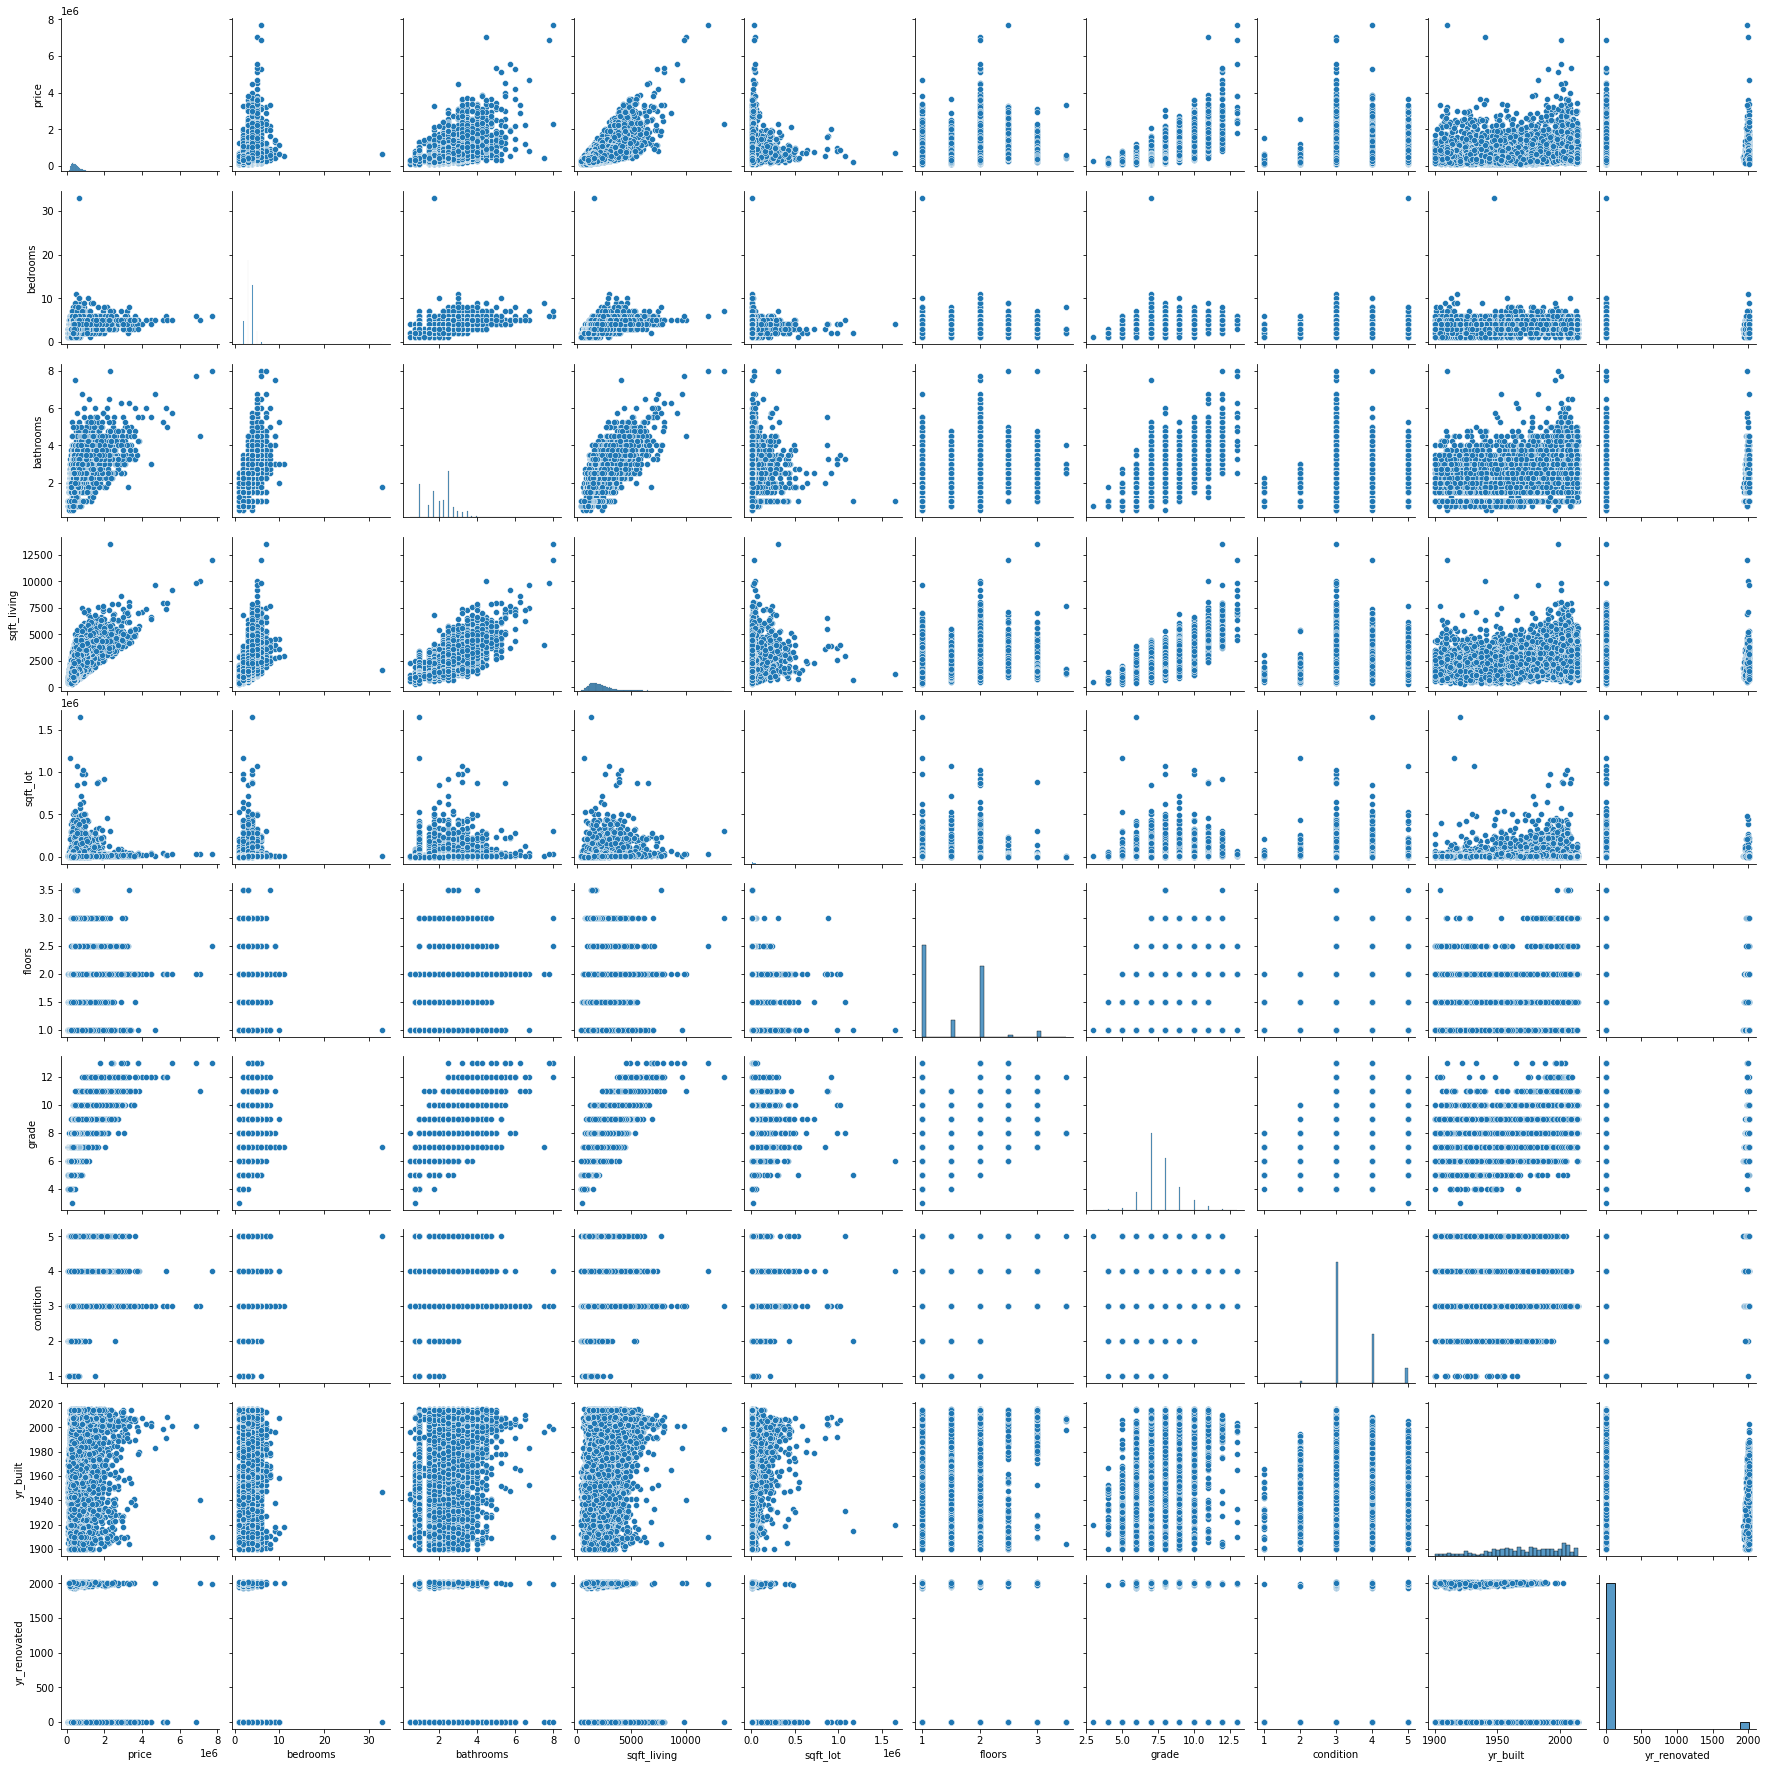

In [67]:
#Viewing each feature in the correlated data paired against 
#each other to view correlations and see trends
sns.pairplot(new_df);

In [116]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

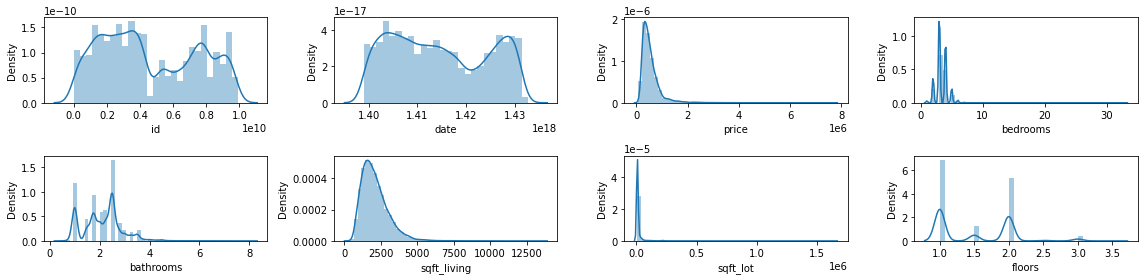

In [117]:
#Viewing the univariate distribution for each feature in the testing dataframe

#Creating variables for the number of rows and columns
rows = 2
cols = 4

#Creating subplot
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (16,4))

#Iterating through each row and column of the testing dataframe
col = df.columns
index = 0
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]], ax = ax[i][j])
        index += 1

plt.tight_layout();

In [126]:
#Creating and viewing the correlation map 
corrmat = new_df.corr
corrmat()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,condition,yr_built,yr_renovated
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.667951,0.036056,0.053953,0.129599
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.356563,0.026496,0.155670,0.018495
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.665838,-0.126479,0.507173,0.051050
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.762779,-0.059445,0.318152,0.055660
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.114731,-0.008830,0.052946,0.004513
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.458794,-0.264075,0.489193,0.003535
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,1.000000,-0.146896,0.447865,0.016669
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,-0.146896,1.000000,-0.361592,-0.061858
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.447865,-0.361592,1.000000,-0.225209
yr_renovated,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.016669,-0.061858,-0.225209,1.000000


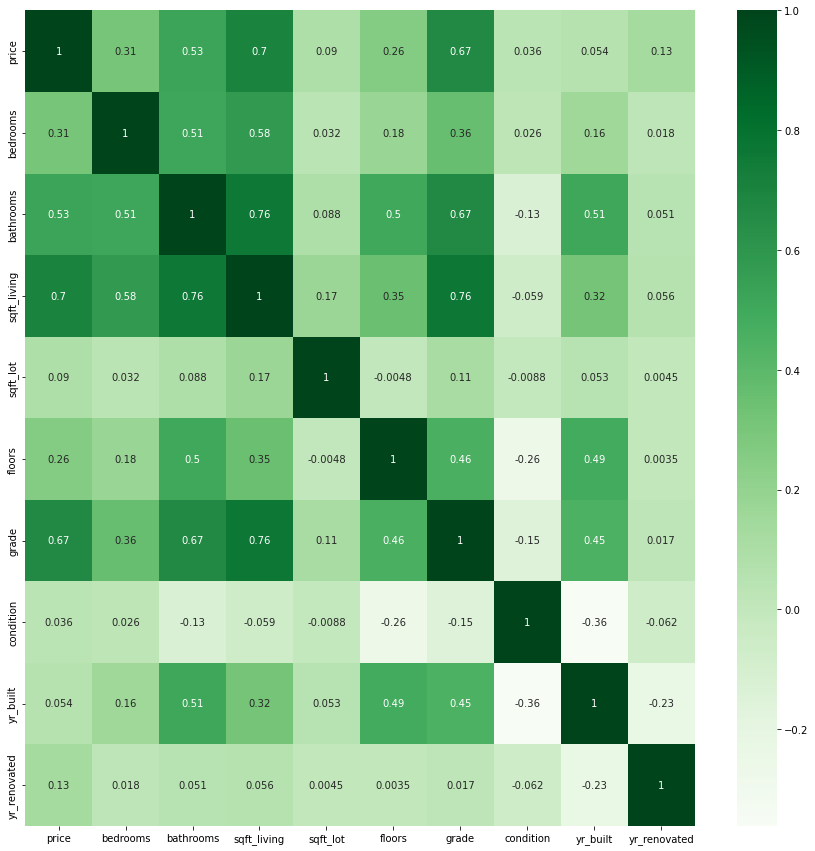

In [127]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat(), annot=True,cmap='Greens');


In [128]:
abs(new_df.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,condition,yr_built,yr_renovated
price,True,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,True,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False
grade,False,False,False,True,False,False,True,False,False,False
condition,False,False,False,False,False,False,False,True,False,False
yr_built,False,False,False,False,False,False,False,False,True,False
yr_renovated,False,False,False,False,False,False,False,False,False,True


In [130]:
# Drop sqft_living 


In [131]:
#fuction to retrive the correlated data at a certain threshold
def getCorrelationFeatures(corrdata, threshold):
    feature = []
    value = []
    
# If the absolute value of the correlated feature is above 
# the given threshold, the value and the feature will be appended 
# to a new list
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index]) > threshold:
            feature.append(index)
            value.append(corrdata[index])
    df = pd.DataFrame(data = value, index = feature, columns = ['Corr Value'])
    return df

In [132]:
#Setting the threshold
threshold = 0.5

#The correlated features for price greater than 50%
corr_value = getCorrelationFeatures(corrmat()['price'], threshold)
corr_value

,Corr Value
price,1.000000
bathrooms,0.525906
sqft_living,0.701917
grade,0.667951


In [133]:
corr_value.index

Index(['price', 'bathrooms', 'sqft_living', 'grade'], dtype='object')

In [135]:
#Creating a dataframe from the indices of the corr value
correlated_data = new_df[corr_value.index]
correlated_data.head()

,price,bathrooms,sqft_living,grade
0,221900.0,1.00,1180,7
1,538000.0,2.25,2570,7
2,180000.0,1.00,770,6
3,604000.0,3.00,1960,7
4,510000.0,2.00,1680,8


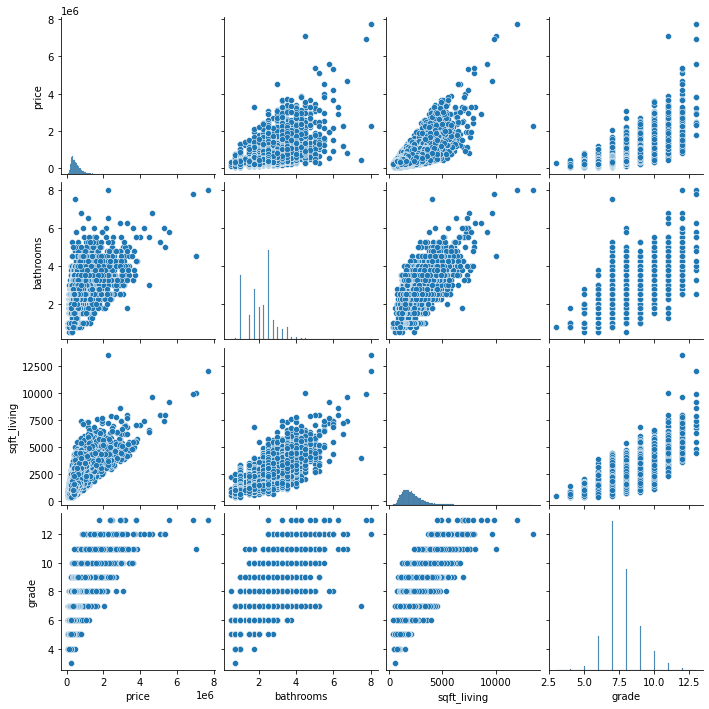

In [137]:
#Viewing each feature in the correlated data paired against 
#each other to view correlations and see trends
sns.pairplot(correlated_data);

<AxesSubplot:>

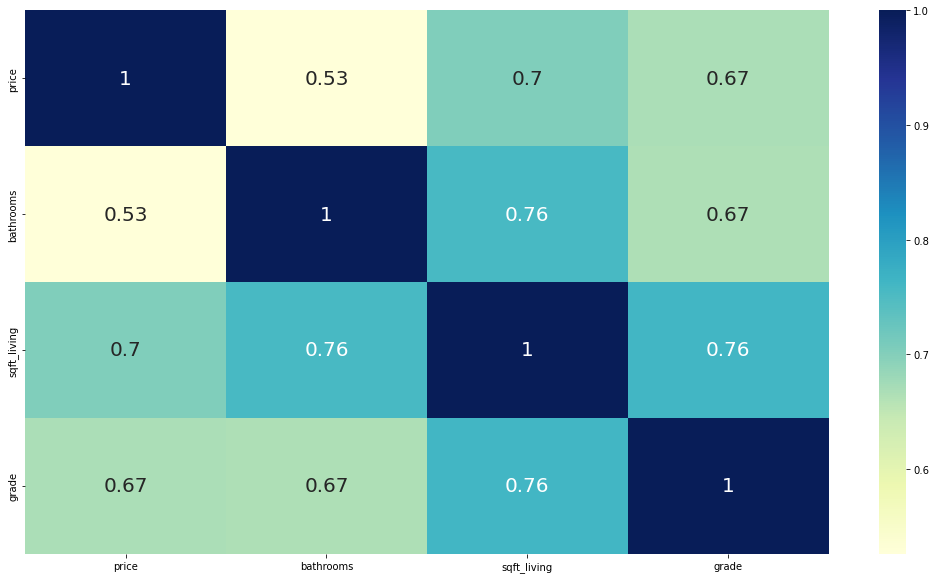

In [138]:
#Creating Subplots
plt.subplots(figsize = (18,10))
#Heatmap showing the correlation between correlated features in the testing dataframe
sns.heatmap(correlated_data.corr(), annot = True, annot_kws = {'size':20}, cmap="YlGnBu")

# model

In [139]:
#X is a list of all of the features (also known as independent variables or inputs) excluding price
X = correlated_data.drop(labels = ['price'], axis = 1)
#y is the outcome, price
y = correlated_data['price']
X.head()

,bathrooms,sqft_living,grade
0,1.00,1180,7
1,2.25,2570,7
2,1.00,770,6
3,3.00,1960,7
4,2.00,1680,8


In [140]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [141]:
X.shape

(21597, 3)

In [142]:
#Creating a train and test split, where the test size is 20% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [143]:
X_train.shape, X_test.shape

((17277, 3), (4320, 3))

In [144]:
#Choosing a linear regression model to feed the data to
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [146]:
#Setting the test predicition for the linear model
y_predict = model.predict(X_test)

In [147]:
#Creating a dataframe for the predicted values and actual values from the regression
y1_df = pd.DataFrame(data = [y_predict, y_test])

In [148]:
#0 predicted values
#1 actual values
y1_df.T.head()

,0,1
0,1.019291e+06,650000.0
1,5.690308e+05,625000.0
2,9.803980e+05,822500.0
3,2.055172e+05,179900.0
4,8.793408e+05,370000.0


In [151]:
#Instantiating variables for the R2 score, mean absolute error and mean squared error
score = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)

print('r2_score: ', score)
print('mae: ', mae)
print('mse: ', mse)

r2_score:  0.5236356475434574
mae:  161180.4223665728
mse:  56076411416.08098


In [152]:
#Creating empty lists for the performance metric function
total_features = []
total_features_name = []
selected_correlation_value = []
r2_scores = []
mae_value = []
mse_value = []


#Defining function for correlated features and reyurn a dataframe
def performance_Metric(features, threshold, y_true, y_pred):
    score = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    
    total_features.append(len(features)-1)
    total_features_name.append(str(features))
    selected_correlation_value.append(threshold)
    r2_scores.append(score)
    mae_value.append(mae)
    mse_value.append(mse)
    
    metric_dataframe = pd.DataFrame(data = [total_features_name, total_features,
                                             selected_correlation_value,
                                             r2_scores, mae_value, mse_value], 
                                             index = ['Features', '# of Features', 'Corr Value',
                                             'R2 Score', 'MAE', 'MSE'])
    return metric_dataframe.T

In [153]:
performance_Metric(correlated_data, threshold, y_test, y_predict)

,Features,# of Features,Corr Value,R2 Score,MAE,MSE
0,price bathrooms sqft_living grade...,21596,0.5,0.523636,161180.422367,56076411416.080978


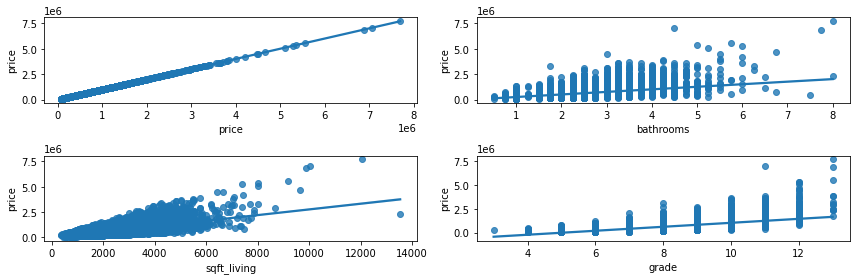

In [154]:
#Viewing the linear relationship between correlated features against price
rows = 2
cols = 2

#Creating a subplot to graph relationships
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (12,4))
col = correlated_data.columns
index = 0

#generating a graph for each row and column
for i in range(rows):
    for j in range(cols):
        sns.regplot(x = correlated_data[col[index]], y = correlated_data['price'], ax = ax[i][j])
        index += 1

plt.tight_layout()

In [155]:
# Note the difference in argument order
model = sm.OLS(y_train, X_train).fit() ## sm.OLS(output, input)
predictions = model.predict(X_test)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.838
Model:                            OLS   Adj. R-squared (uncentered):              0.838
Method:                 Least Squares   F-statistic:                          2.986e+04
Date:                Sun, 11 Dec 2022   Prob (F-statistic):                        0.00
Time:                        19:33:02   Log-Likelihood:                     -2.4023e+05
No. Observations:               17277   AIC:                                  4.805e+05
Df Residuals:                   17274   BIC:                                  4.805e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bathrooms   -4.136e+04   4086.893    -10.119      0.000   -4.94e+04   -3.33e+04
sqft_living   280.3274      3.505     79.989      0.000     273.458     287.197
grade        7181.3291   1015.183      7.074      0.000    5191.468    9171.190
==============================================================================
Omnibus:                    13527.998   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           685666.560
Skew:                           3.343   Prob(JB):                         0.00
Kurtosis:                      33.129   Cond. No.                     4.68e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Modeling

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
reg = LinearRegression()

In [79]:
main_y = new_df['price']
 

train1 = new_df.drop(['price','yr_renovated'],axis=1)
train1.head()


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,condition,yr_built,renovation
0,3,1.00,1180,5650,1.0,7,3,1955,0
1,3,2.25,2570,7242,2.0,7,3,1951,1
2,2,1.00,770,10000,1.0,6,3,1933,1
3,4,3.00,1960,5000,1.0,7,5,1965,0
4,3,2.00,1680,8080,1.0,8,3,1987,0


In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x_train , x_test , y_train , y_test = train_test_split(train1 , main_y , test_size = 0.10,random_state =2)

In [82]:
reg.fit(x_train,y_train)

LinearRegression()

In [83]:
reg.score(x_test,y_test)

0.6206413663854421

In [84]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [85]:
clf.fit(x_train, y_train)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


GradientBoostingRegressor(loss='ls', max_depth=5, n_estimators=400)

In [86]:
clf.score(x_test,y_test)

0.7775898588344873